MSE:  26.273436197177794
R²:  0.9685876042130049


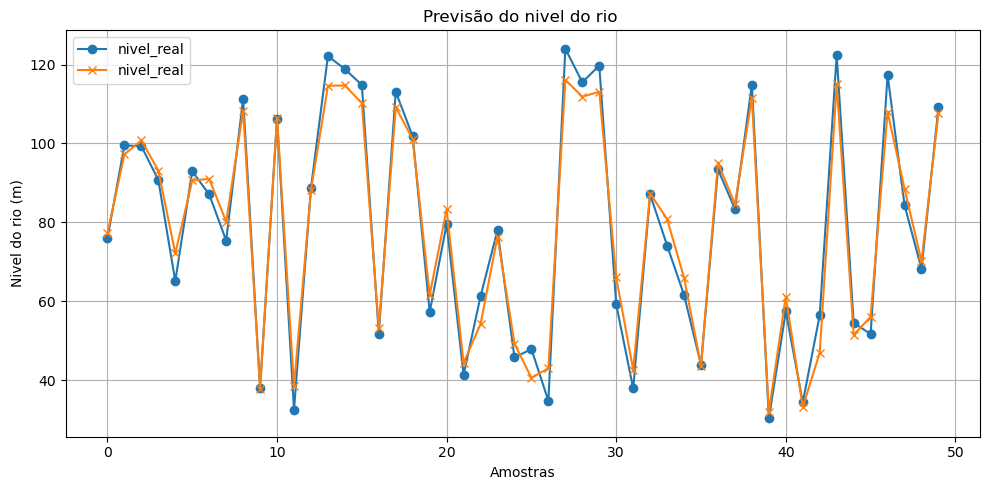

In [34]:
import numpy as np # Trabalhar com array
import pandas as pd # Para trabalhar com tabelas
import matplotlib.pyplot as plt #Geração de gráficos
from sklearn.model_selection import train_test_split # Para dividir os dados em dados de treino e de teste
from sklearn.preprocessing import MinMaxScaler # Para normalizar o dado (transformar)
from sklearn.neural_network import MLPRegressor # MLP para regressão
from sklearn.metrics import mean_squared_error, r2_score  # metricas de avaliaçção

# faz uma produção de dados aleatorios 
np.random.seed(42) #Semente aleatório de dados (42 valor do conjunto aleatório)

dias = 1000 # Números de dias simulados


chuvas = np.random.normal(10, 3, dias) # 10 é a quantidade de chuvas, 3 é a margem de erro, total de dias
# Simulaão de quantidade de chuvas (mm) com a média de 10 e margem de erro 3

temperaturas = np.random.normal(27, 2, dias) # Simulado de temperatura em C° com média de 27 e margem de 2
nivel_anteriores  = np.cumsum(np.random.normal(0.1,0.05, dias)) + 25 #Simulação dos niveis de rio é com base na soma acumulada

#Calcular o nivel do rio no dia seguinte / essa formula é fictician (random) - aleatório
nivel_real = nivel_anteriores + 0.05 * chuvas - 0.028 * temperaturas + np.random.normal(0,0.3,dias)

df = pd.DataFrame(
    {
        'chuva' : chuvas,
        'temperatura' : temperaturas,
        'nivel_anterior': nivel_anteriores,
        'nivel_real': nivel_real  
    }
)



X = df[['chuva','temperatura','nivel_anterior']] #Seleção das colunas da tabela criada para entrada de dados (features)

y = df['nivel_real'] # Seleção da coluna de saída - Aquilo que queremos prever (target)

# criação de Normalizadores 
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X) #Aplica a normalização nos dados de entradas (X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()#Aplica a normalização de saida e transforma em 2D em 1D. ravel()

X_train, X_teste, y_train, y_teste = train_test_split( # Taxa de teste - 80% treino, 20%Teste - utilizando a seed 42
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

mlp = MLPRegressor( # Criando a rede neural
    hidden_layer_sizes=(10, 10), # duas camadas com 10 neuronio / quantidade de neuronio
    activation='relu', # Função de ativação ReLu/result 0 ou 1
    solver='adam', # otimizador ADam/ limpa o reultado
    max_iter= 1000,  #maximo de interação
    random_state=42 # Valor da semente
)

# parte de treino
mlp.fit(X_train, y_train) # Treino da rede com os dados normalizados de treino


y_pred_scaled = mlp.predict(X_teste) # Previsão da MLP com base nos dados de teste

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel() # Desnormalizando as previsões para voltarem a escala original

y_test_original = scaler_y.inverse_transform(y_teste.reshape(-1, 1)).ravel() # Desnormalizando os valores reais para compraração - 1D para 2D

# avaliação de teste 

# quando mais perto de 0 melhor, quanto maior longe de 0, não é bom 
print('MSE: ',mean_squared_error(y_test_original, y_pred))# calculo erro = quanto mais proximo de 0 melhor / 

# mais proximo de 1 melhor
print('R²: ',r2_score(y_test_original, y_pred)) # Quanto mais proximo de 1 melhor 

# montando meus graficos 

plt.figure(figsize=(10, 5))
plt.plot(y_test_original[:50], label='nivel_real', marker='o')
plt.plot(y_pred[:50], label='nivel_real', marker='x')
plt.xlabel('Amostras')
plt.ylabel('Nivel do rio (m)')
plt.title('Previsão do nivel do rio ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
